# 分析Z500上4DVar的调参结果

In [1]:
import sys
sys.path.append("../")
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from src.utils.plot import subplot_daloop
from src.utils.data_utils import NAME_TO_VAR
from scipy.signal import exponential

In [5]:
DALOOP_DIR = "../../results/ablation_study/tune_4dvar"
ERA5_DIR = "../../data/era5"
VARIABLE = "geopotential"
LEVEL = 500
RESOLUTION = 5.625
inflations = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [6]:
gt = xr.open_mfdataset(f"{ERA5_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")

## 绘制同化预报循环误差

In [7]:
rmses_4dvar, accs_4dvar, maes_4dvar = [], [], []
for inflation in inflations:
    rmses_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/rmse_4dvar_inflation{inflation}_obspartial0.2.nc"))
    accs_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/acc_4dvar_inflation{inflation}_obspartial0.2.nc"))
    maes_4dvar.append(xr.open_mfdataset(f"{DALOOP_DIR}/mae_4dvar_inflation{inflation}_obspartial0.2.nc"))

OSError: no files to open

In [5]:
rmse = {
    "4DVar Inflation 1.0": rmses_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.1": rmses_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.2": rmses_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.3": rmses_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.4": rmses_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.5": rmses_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.6": rmses_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.7": rmses_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.8": rmses_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.9": rmses_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 2.0": rmses_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

acc = {
    "4DVar Inflation 1.0": accs_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.1": accs_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.2": accs_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.3": accs_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.4": accs_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.5": accs_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.6": accs_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.7": accs_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.8": accs_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.9": accs_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 2.0": accs_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

mae = {
    "4DVar Inflation 1.0": maes_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.1": maes_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.2": maes_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.3": maes_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.4": maes_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.5": maes_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.6": maes_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.7": maes_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.8": maes_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 1.9": maes_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVar Inflation 2.0": maes_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

In [6]:
def ema(raw_data, ratio):
    smooth = np.zeros_like(raw_data)
    smooth[0] = raw_data[0]
    for i in range(1, len(raw_data)):
        smooth[i] = ratio * raw_data[i] + (1 - ratio) * smooth[i-1]

    return smooth

In [25]:
rmse_ema = {
    "4DVar Inflation 1.0": ema(rmses_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.1": ema(rmses_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.2": ema(rmses_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.3": ema(rmses_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.4": ema(rmses_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.5": ema(rmses_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.6": ema(rmses_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.7": ema(rmses_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.8": ema(rmses_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.9": ema(rmses_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 2.0": ema(rmses_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
}

acc_ema = {
    "4DVar Inflation 1.0": ema(accs_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.1": ema(accs_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.2": ema(accs_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.3": ema(accs_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.4": ema(accs_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.5": ema(accs_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.6": ema(accs_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.7": ema(accs_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.8": ema(accs_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.9": ema(accs_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 2.0": ema(accs_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
}

mae_ema = {
    "4DVar Inflation 1.0": ema(maes_4dvar[0][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.1": ema(maes_4dvar[1][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.2": ema(maes_4dvar[2][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.3": ema(maes_4dvar[3][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.4": ema(maes_4dvar[4][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.5": ema(maes_4dvar[5][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.6": ema(maes_4dvar[6][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.7": ema(maes_4dvar[7][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.8": ema(maes_4dvar[8][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 1.9": ema(maes_4dvar[9][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
    "4DVar Inflation 2.0": ema(maes_4dvar[10][NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values, 0.5),
}

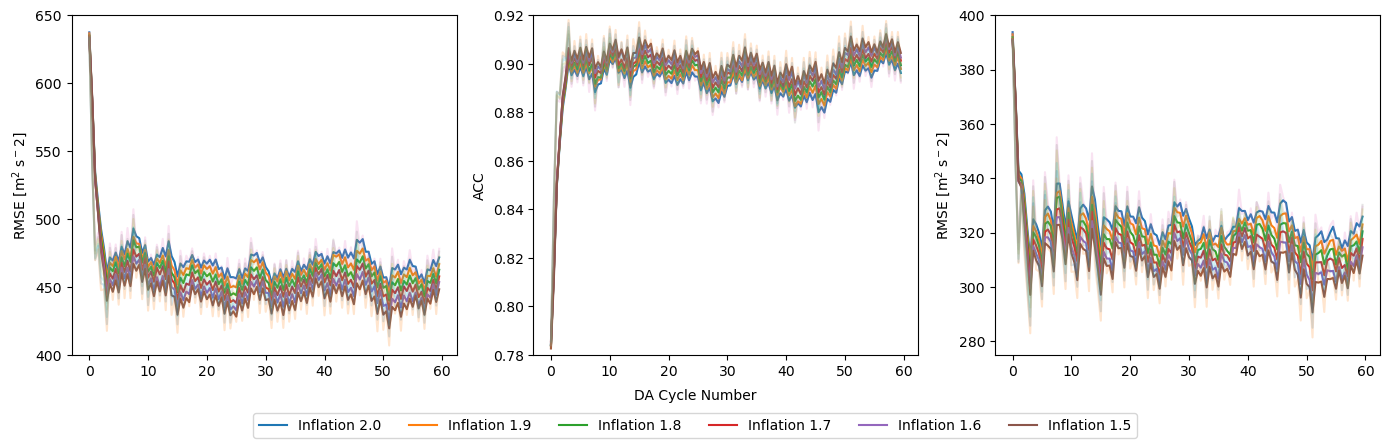

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4.5))
# axes[0].plot(rmse["4DVar Inflation 1.0"], label=f"Inflation 1.0")
# axes[0].plot(rmse["4DVar Inflation 1.1"], label=f"Inflation 1.1")
# axes[0].plot(rmse["4DVar Inflation 1.2"], label=f"Inflation 1.2")
# axes[0].plot(rmse["4DVar Inflation 1.3"], label=f"Inflation 1.3")
# axes[0].plot(rmse["4DVar Inflation 1.4"], label=f"Inflation 1.4")

axes[0].plot(rmse_ema["4DVar Inflation 2.0"], label=f"Inflation 2.0")
axes[0].plot(rmse_ema["4DVar Inflation 1.9"], label=f"Inflation 1.9")
axes[0].plot(rmse_ema["4DVar Inflation 1.8"], label=f"Inflation 1.8")
axes[0].plot(rmse_ema["4DVar Inflation 1.7"], label=f"Inflation 1.7")
axes[0].plot(rmse_ema["4DVar Inflation 1.6"], label=f"Inflation 1.6")
axes[0].plot(rmse_ema["4DVar Inflation 1.5"], label=f"Inflation 1.5")

axes[0].plot(rmse["4DVar Inflation 2.0"], alpha=0.2)#, label=f"Inflation 2.0")
axes[0].plot(rmse["4DVar Inflation 1.9"], alpha=0.2)#, label=f"Inflation 1.9")
axes[0].plot(rmse["4DVar Inflation 1.8"], alpha=0.2)#, label=f"Inflation 1.8")
axes[0].plot(rmse["4DVar Inflation 1.7"], alpha=0.2)# , label=f"Inflation 1.7")
axes[0].plot(rmse["4DVar Inflation 1.6"], alpha=0.2)#, label=f"Inflation 1.6")
axes[0].plot(rmse["4DVar Inflation 1.5"], alpha=0.2)#, label=f"Inflation 1.5")

# axes[1].plot(acc["4DVar Inflation 1.0"], label=f"Inflation 1.0")
# axes[1].plot(acc["4DVar Inflation 1.1"], label=f"Inflation 1.1")
# axes[1].plot(acc["4DVar Inflation 1.2"], label=f"Inflation 1.2")
# axes[1].plot(acc["4DVar Inflation 1.3"], label=f"Inflation 1.3")
# axes[1].plot(acc["4DVar Inflation 1.4"], label=f"Inflation 1.4")
axes[1].plot(acc_ema["4DVar Inflation 2.0"], label=f"Inflation 2.0")
axes[1].plot(acc_ema["4DVar Inflation 1.9"], label=f"Inflation 1.9")
axes[1].plot(acc_ema["4DVar Inflation 1.8"], label=f"Inflation 1.8")
axes[1].plot(acc_ema["4DVar Inflation 1.7"], label=f"Inflation 1.7")
axes[1].plot(acc_ema["4DVar Inflation 1.6"], label=f"Inflation 1.6")
axes[1].plot(acc_ema["4DVar Inflation 1.5"], label=f"Inflation 1.5")

axes[1].plot(acc["4DVar Inflation 2.0"], alpha=0.2)
axes[1].plot(acc["4DVar Inflation 1.9"], alpha=0.2)
axes[1].plot(acc["4DVar Inflation 1.8"], alpha=0.2)
axes[1].plot(acc["4DVar Inflation 1.7"], alpha=0.2)
axes[1].plot(acc["4DVar Inflation 1.6"], alpha=0.2)
axes[1].plot(acc["4DVar Inflation 1.5"], alpha=0.2)

# axes[2].plot(mae["4DVar Inflation 1.0"], label=f"Inflation 1.0")
# axes[2].plot(mae["4DVar Inflation 1.1"], label=f"Inflation 1.1")
# axes[2].plot(mae["4DVar Inflation 1.2"], label=f"Inflation 1.2")
# axes[2].plot(mae["4DVar Inflation 1.3"], label=f"Inflation 1.3")
# axes[2].plot(mae["4DVar Inflation 1.4"], label=f"Inflation 1.4")
axes[2].plot(mae_ema["4DVar Inflation 2.0"], label=f"Inflation 2.0")
axes[2].plot(mae_ema["4DVar Inflation 1.9"], label=f"Inflation 1.9")
axes[2].plot(mae_ema["4DVar Inflation 1.8"], label=f"Inflation 1.8")
axes[2].plot(mae_ema["4DVar Inflation 1.7"], label=f"Inflation 1.7")
axes[2].plot(mae_ema["4DVar Inflation 1.6"], label=f"Inflation 1.6")
axes[2].plot(mae_ema["4DVar Inflation 1.5"], label=f"Inflation 1.5")

axes[2].plot(mae["4DVar Inflation 2.0"], alpha=0.2)
axes[2].plot(mae["4DVar Inflation 1.9"], alpha=0.2)
axes[2].plot(mae["4DVar Inflation 1.8"], alpha=0.2)
axes[2].plot(mae["4DVar Inflation 1.7"], alpha=0.2)
axes[2].plot(mae["4DVar Inflation 1.6"], alpha=0.2)
axes[2].plot(mae["4DVar Inflation 1.5"], alpha=0.2)

for i in range(3):
    axes[0].set_ylim(400, 650)
    axes[1].set_ylim(0.78, 0.92)
    axes[2].set_ylim(275, 400)
    axes[i].set_xticks(np.arange(0, 121, 20))
    axes[i].set_xticklabels([0, 10, 20, 30, 40, 50, 60])

axes[0].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
axes[1].set_ylabel(f"ACC")
axes[2].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=6, loc='lower center', bbox_to_anchor=(0.5, 0))
fig.text(0.5, 0.1, f"DA Cycle Number", ha='center')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"tune_4dvar_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.png",dpi=300, bbox_inches="tight")
plt.savefig(f"tune_4dvar_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.pdf",dpi=300, bbox_inches="tight")